In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

# [EDA] All Clicks Data

In [2]:
all_clicks = '/workspace/datasets/train.csv'

In [3]:
all_clicks_df = pd.read_csv(all_clicks)

In [4]:
all_clicks_df.head()

,user,sku,category,query,click_time,query_time
0,000000df17cd56a5df4a94074e133c9d4739fae3,2125233,abcat0101001,Televisiones Panasonic 50 pulgadas,2011-09-01 23:44:52.533,2011-09-01 23:43:59.752
1,000001928162247ffaf63185cd8b2a244c78e7c6,2009324,abcat0101001,Sharp,2011-09-05 12:25:37.42,2011-09-05 12:25:01.187
2,000017f79c2b5da56721f22f9fdd726b13daf8e8,1517163,pcmcat193100050014,nook,2011-08-24 12:56:58.91,2011-08-24 12:55:13.012
3,000017f79c2b5da56721f22f9fdd726b13daf8e8,2877125,abcat0101001,rca,2011-10-25 07:18:14.722,2011-10-25 07:16:51.759
4,000017f79c2b5da56721f22f9fdd726b13daf8e8,2877134,abcat0101005,rca,2011-10-25 07:19:51.697,2011-10-25 07:16:51.759


In [5]:
all_clicks_df.columns

Index(['user', 'sku', 'category', 'query', 'click_time', 'query_time'], dtype='object')

In [6]:
all_clicks_df.columns

Index(['user', 'sku', 'category', 'query', 'click_time', 'query_time'], dtype='object')

In [7]:
df = all_clicks_df

In [8]:
print("total clicks: {:,}".format(len(df)))

total clicks: 1,865,269


## [EDA] Clicks vs Users

In [9]:
df['query_count'] = 1

In [10]:
user_df = df[['user', 'query_count']].groupby('user').sum()

In [11]:
user_df.sort_values(by = ['query_count'], ascending=False, inplace=True)

In [12]:
bins = np.arange(0, 10) * 5

In [13]:
udf_gqcb = user_df.groupby(pd.cut(user_df['query_count'], bins)).count()

In [14]:
udf_gqcb.index.names = ['user_count']

In [15]:
udf_gqcb['percentage'] = (udf_gqcb['query_count'] * 100/ udf_gqcb['query_count'].sum()).round(2)

In [16]:
udf_gqcb

,query_count,percentage
user_count,,
"(0, 5]",1245146,98.14
"(5, 10]",11625,0.92
"(10, 15]",8120,0.64
"(15, 20]",3429,0.27
"(20, 25]",363,0.03
"(25, 30]",14,0.00
"(30, 35]",3,0.00
"(35, 40]",1,0.00
"(40, 45]",1,0.00


* most of the users are unique


## [EDA] User vs Category

In [17]:
df[df['user'] == '3703e0615ca499fef8df29887c39e9918be93182']

,user,sku,category,query,click_time,query_time,query_count
399868,3703e0615ca499fef8df29887c39e9918be93182,8584613,cat02015,dog day afternoon,2011-08-30 19:41:03.209,2011-08-30 19:40:47.338,1
399869,3703e0615ca499fef8df29887c39e9918be93182,3308174,cat02015,dog day afternoon,2011-08-30 19:41:43.314,2011-08-30 19:40:47.338,1
399870,3703e0615ca499fef8df29887c39e9918be93182,7649798,cat02015,dog day afternoon,2011-08-30 19:41:51.173,2011-08-30 19:40:47.338,1
399871,3703e0615ca499fef8df29887c39e9918be93182,9728756,cat02661,mumford and sons,2011-08-30 23:13:06.946,2011-08-30 23:13:01.014,1
399872,3703e0615ca499fef8df29887c39e9918be93182,9481189,cat02685,five finger death punch,2011-08-30 23:19:39.225,2011-08-30 23:19:28.877,1
399873,3703e0615ca499fef8df29887c39e9918be93182,9295014,cat02015,grease,2011-08-31 08:58:12.469,2011-08-31 08:57:50.207,1
399874,3703e0615ca499fef8df29887c39e9918be93182,9477041,abcat0703002,grease,2011-08-31 09:00:18.965,2011-08-31 08:57:50.207,1
399875,3703e0615ca499fef8df29887c39e9918be93182,9331546,abcat0703002,assassins creed,2011-08-31 09:20:40.76,2011-08-31 09:19:44.082,1
399876,3703e0615ca499fef8df29887c39e9918be93182,4789866,cat02662,led zeppelin,2011-08-31 12:20:20.346,2011-08-31 12:19:38.493,1
399877,3703e0615ca499fef8df29887c39e9918be93182,2684272,cat02015,american history x,2011-08-31 13:17:26.741,2011-08-31 13:17:11.204,1


In [18]:
user_df

,query_count
user,
3703e0615ca499fef8df29887c39e9918be93182,41
894855ee1622a7bf29566901db28108efd11726d,36
307e4cf0596b825fbd80b58f2c8e0d24dd695d2d,34
0ea5917dc7b832fa1718ce36cd5e5a877038def5,33
3af61fb6166918fc5873d4684e75e808f2d44260,31
...,...
5fc328e5973d002533cc9ec93e245acec974a605,1
5fc3326b87740394120539ac3b91d92f3b05526a,1
5fc334216dcf98c5446d4bba98d5b7bfbb01160b,1


In [19]:
user_by_category = df.groupby(['user', 'category']).count().sort_values(['query', 'user', 'category'], ascending=False)

In [20]:
user_by_category

sku  query  \
user                                     category                         
894855ee1622a7bf29566901db28108efd11726d cat02015             34     34   
f59041194e2074be9f2c4c7a82820a710721c53b cat02015             25     25   
3690e2a358162d94761b827bdc9c505c6eb33b4a cat02685             23     23   
3703e0615ca499fef8df29887c39e9918be93182 cat02015             22     22   
ae1759f2aedd20a57eb17ad605fda7287a5a9f1e cat02015             20     20   
...                                                          ...    ...   
000017f79c2b5da56721f22f9fdd726b13daf8e8 pcmcat193100050014    1      1   
                                         abcat0101005          1      1   
                                         abcat0101001          1      1   
000001928162247ffaf63185cd8b2a244c78e7c6 abcat0101001          1      1   
000000df17cd56a5df4a94074e133c9d4739fae3 abcat0101001          1      1   

                                                             click_time  \
user                                     category                         
894855ee1622a7bf29566901db28108efd11726d cat02015                    34   
f59041194e2074be9f2c4c7a82820a710721c53b cat02015                    25   
3690e2a358162d94761b827bdc9c505c6eb33b4a cat02685                    23   
3703e0615ca499fef8df29887c39e9918be93182 cat02015                    22   
ae1759f2aedd20a57eb17ad605fda7287a5a9f1e cat02015                    20   
...                                                                 ...   
000017f79c2b5da56721f22f9fdd726b13daf8e8 pcmcat193100050014           1   
                                         abcat0101005                 1   
                                         abcat0101001                 1   
000001928162247ffaf63185cd8b2a244c78e7c6 abcat0101001                 1   
000000df17cd56a5df4a94074e133c9d4739fae3 abcat0101001                 1   

                                                             query_time  \
user                                     category                         
894855ee1622a7bf29566901db28108efd11726d cat02015                    34   
f59041194e2074be9f2c4c7a82820a710721c53b cat02015                    25   
3690e2a358162d94761b827bdc9c505c6eb33b4a cat02685                    23   
3703e0615ca499fef8df29887c39e9918be93182 cat02015                    22   
ae1759f2aedd20a57eb17ad605fda7287a5a9f1e cat02015                    20   
...                                                                 ...   
000017f79c2b5da56721f22f9fdd726b13daf8e8 pcmcat193100050014           1   
                                         abcat0101005                 1   
                                         abcat0101001                 1   
000001928162247ffaf63185cd8b2a244c78e7c6 abcat0101001                 1   
000000df17cd56a5df4a94074e133c9d4739fae3 abcat0101001                 1   

                                                             query_count  
user                                     category                         
894855ee1622a7bf29566901db28108efd11726d cat02015                     34  
f59041194e2074be9f2c4c7a82820a710721c53b cat02015                     25  
3690e2a358162d94761b827bdc9c505c6eb33b4a cat02685                     23  
3703e0615ca499fef8df29887c39e9918be93182 cat02015                     22  
ae1759f2aedd20a57eb17ad605fda7287a5a9f1e cat02015                     20  
...                                                                  ...  
000017f79c2b5da56721f22f9fdd726b13daf8e8 pcmcat193100050014            1  
                                         abcat0101005                  1  
                                         abcat0101001                  1  
000001928162247ffaf63185cd8b2a244c78e7c6 abcat0101001                  1  
000000df17cd56a5df4a94074e133c9d4739fae3 abcat0101001                  1  

[1645364 rows x 5 columns]

In [21]:
user_df.index[0:20]

Index(['3703e0615ca499fef8df29887c39e9918be93182',
       '894855ee1622a7bf29566901db28108efd11726d',
       '307e4cf0596b825fbd80b58f2c8e0d24dd695d2d',
       '0ea5917dc7b832fa1718ce36cd5e5a877038def5',
       '3af61fb6166918fc5873d4684e75e808f2d44260',
       '99dfce2c7c4a77107fb901e23afcefce61e2ec28',
       'f59041194e2074be9f2c4c7a82820a710721c53b',
       '7e708681b4f6a8dece0f538e11b535a780973068',
       'fe401455ddf0b4aed64097dd3b70e6e4517a4548',
       '7a3d146cc17f53ee49e05dc1337b4f3c2531afc2',
       '21e13461793cec31922f4e2091bd72be314fa130',
       'de1d58d536b8061a2d0af3cb939f3105c2401fec',
       'a90be5c6452ca0dfdabb3cb2374895c6e8ea8aa1',
       '519c8f36aa71e6eb590e5506f7ce76468ba241f6',
       '785ec0d05684a5859f6b69acaa8b6e1f8e80d4b9',
       '9b57966e571a8d36dee5b2c9ad3f0326619e0e15',
       '1d7ca95b727b6c17dbcdb09b0dce279c6cfd5976',
       '68daf5b38c0901ede405f1d7d670dbbf7300694b',
       'b7fe3191093f02346274436d06f6b53d53278952',
       'a9b49d5a48d20318e3fd2d8

In [22]:
# user_df.index[0:20]
# user_by_category[user_by_category['user'].isin(['3703e0615ca499fef8df29887c39e9918be93182'])]
# user_by_category.columns

ubc_df = user_by_category.reset_index(level=1)

In [23]:
pd.set_option('display.max_rows', 500)

In [24]:
ubc_df[ubc_df.index.isin(user_df.index[0:10])].sort_index()

,category,sku,query,click_time,query_time,query_count
user,,,,,,
0ea5917dc7b832fa1718ce36cd5e5a877038def5,cat02719,2,2,2,2,2
0ea5917dc7b832fa1718ce36cd5e5a877038def5,cat02674,1,1,1,1,1
0ea5917dc7b832fa1718ce36cd5e5a877038def5,cat02684,1,1,1,1,1
0ea5917dc7b832fa1718ce36cd5e5a877038def5,cat02185,2,2,2,2,2
0ea5917dc7b832fa1718ce36cd5e5a877038def5,cat02662,2,2,2,2,2
0ea5917dc7b832fa1718ce36cd5e5a877038def5,cat02673,2,2,2,2,2
0ea5917dc7b832fa1718ce36cd5e5a877038def5,cat02685,2,2,2,2,2
0ea5917dc7b832fa1718ce36cd5e5a877038def5,cat02717,2,2,2,2,2
0ea5917dc7b832fa1718ce36cd5e5a877038def5,cat02670,1,1,1,1,1


In [25]:
df

,user,sku,category,query,click_time,query_time,query_count
0,000000df17cd56a5df4a94074e133c9d4739fae3,2125233,abcat0101001,Televisiones Panasonic 50 pulgadas,2011-09-01 23:44:52.533,2011-09-01 23:43:59.752,1
1,000001928162247ffaf63185cd8b2a244c78e7c6,2009324,abcat0101001,Sharp,2011-09-05 12:25:37.42,2011-09-05 12:25:01.187,1
2,000017f79c2b5da56721f22f9fdd726b13daf8e8,1517163,pcmcat193100050014,nook,2011-08-24 12:56:58.91,2011-08-24 12:55:13.012,1
3,000017f79c2b5da56721f22f9fdd726b13daf8e8,2877125,abcat0101001,rca,2011-10-25 07:18:14.722,2011-10-25 07:16:51.759,1
4,000017f79c2b5da56721f22f9fdd726b13daf8e8,2877134,abcat0101005,rca,2011-10-25 07:19:51.697,2011-10-25 07:16:51.759,1
...,...,...,...,...,...,...,...
1865264,ffffbcfcee8ff636231fa0df557528e6fa2ecdba,3674224,pcmcat247400050000,ttv,2011-10-28 07:30:33.921,2011-10-28 07:27:05.039,1
1865265,ffffddbbdc67c4d775c7232082adaf40c7e7d03c,2986037,pcmcat218000050000,incase,2011-09-11 14:18:12.625,2011-09-11 14:17:57.759,1
1865266,ffffed824a4fc5b78e407a423f72bbbc2f6e5213,3303069,pcmcat248500050020,ds games,2011-10-20 00:24:18.609,2011-10-20 00:23:16.705,1
1865267,fffff158dec2f40d082f7797413f7b6dbc1713e6,2390524,pcmcat209000050008,Archos,2011-10-30 15:42:02.347,2011-10-30 15:40:20.889,1


## [EDA] Query by Category

In [26]:
category_uniq = len(df.category.unique())
print("total unique categories in search: {}".format(category_uniq))

total unique categories in search: 1540


In [27]:
query_by_category = df[['category', 'query_count']].groupby(['category'], as_index=False).sum()

In [28]:
query_by_category.sort_values('query_count', ascending=False, inplace=True)

In [29]:
query_by_category.reset_index(inplace=True)

In [30]:
query_by_category['percentage'] = (query_by_category['query_count']/query_by_category['query_count'].sum()).round(2)

In [31]:
query_by_category[query_by_category['percentage'] != 0.0]

,index,category,query_count,percentage
0,471,cat02015,177638,0.10
1,6,abcat0101001,80213,0.04
2,1438,pcmcat247400050000,79245,0.04
3,1048,pcmcat209000050008,74258,0.04
4,665,pcmcat144700050004,43991,0.02
5,1050,pcmcat209400050001,39682,0.02
6,287,abcat0703002,29809,0.02
7,1439,pcmcat247400050001,27458,0.01
8,57,abcat0201011,25807,0.01
9,1047,pcmcat209000050007,25132,0.01


In [32]:
significant_percentage = (query_by_category[query_by_category['percentage'] != 0.0]['query_count'].sum()/query_by_category['query_count'].sum()).round(2)
print("Total share of significant percentage of category search: {}".format(significant_percentage))

Total share of significant percentage of category search: 0.48


In [33]:
bins = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 1000000]

gbc = df[['category', 'query_count']].groupby('category', as_index=False).count()
gbcb = gbc.groupby(pd.cut(gbc['query_count'], bins)).count()

In [34]:
gbcb = query_by_category['query_count']

In [35]:
gbc_10k = query_by_category[query_by_category['query_count'] >= 500]

In [36]:
gbc_10k

,index,category,query_count,percentage
0,471,cat02015,177638,0.10
1,6,abcat0101001,80213,0.04
2,1438,pcmcat247400050000,79245,0.04
3,1048,pcmcat209000050008,74258,0.04
4,665,pcmcat144700050004,43991,0.02
5,1050,pcmcat209400050001,39682,0.02
6,287,abcat0703002,29809,0.02
7,1439,pcmcat247400050001,27458,0.01
8,57,abcat0201011,25807,0.01
9,1047,pcmcat209000050007,25132,0.01


## Join with Category Data

In [37]:
!head -100 /workspace/datasets/product_data/categories/categories_0001_abcat0010000_to_pcmcat99300050000.xml

<categories>
  <category>
    <id>abcat0010000</id>
    <name>Gift Center</name>
    <path>
      <category>
        <id>cat00000</id>
        <name>Best Buy</name>
      </category>
      <category>
        <id>abcat0010000</id>
        <name>Gift Center</name>
      </category>
    </path>
    <subCategories>
      <category>
        <id>pcmcat140000050035</id>
        <name>Capturing Photos &amp; Videos</name>
      </category>
      <category>
        <id>pcmcat140000050036</id>
        <name>Listening to Digital Music</name>
      </category>
      <category>
        <id>pcmcat140000050037</id>
        <name>Computing Made Easy</name>
      </category>
      <category>
        <id>pcmcat140000050039</id>
        <name>Simple GPS Navigation</name>
      </category>
      <category>
        <id>pcmcat140000050040</id>
        <name>Playing Video Games</name>
      </category>
      <category>
        <id>pcmcat140000050041</id>
        <name>Watching HDTV</name>
      </category>
  

In [1]:
import xml.etree.ElementTree as ET

cat_file = '/workspace/datasets/product_data/categories/categories_0001_abcat0010000_to_pcmcat99300050000.xml'
tree = ET.parse(cat_file)
root = tree.getroot()

subcats = []

for category in root:
    category_id = category.find('id').text
    category_name = category.find('name').text
    subcategories = category.find('subCategories')
    paths = category.find('path')
    path_ids = "/"
    path_names = "/"
    for category in paths:
        path_ids += category.find('id').text + "/"
        path_names += category.find('name').text + "/"
    for subcategory in subcategories:
        subcat_id = subcategory.find('id').text
        subcat_name = subcategory.find('name').text
        subcats.append([subcat_id, subcat_name, category_id, category_name, path_ids, path_names])

In [4]:
sdf = pd.DataFrame(subcats, columns=['subcategory_id', 'subcategory_name', 'category_id', 'category_name', 'path_ids', 'path_names'])

In [5]:
sdf

,subcategory_id,subcategory_name,category_id,category_name,path_ids,path_names
0,pcmcat140000050035,Capturing Photos & Videos,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
1,pcmcat140000050036,Listening to Digital Music,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
2,pcmcat140000050037,Computing Made Easy,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
3,pcmcat140000050039,Simple GPS Navigation,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
4,pcmcat140000050040,Playing Video Games,abcat0010000,Gift Center,/cat00000/abcat0010000/,/Best Buy/Gift Center/
...,...,...,...,...,...,...
5173,pcmcat119300050015,Grads_Over 100,pcmcat84000050003,Graduations,/cat00000/abcat0010000/pcmcat84000050003/,/Best Buy/Gift Center/Graduations/
5174,pcmcat86300050020,Movies Coming to Blu-ray Disc,pcmcat86300050019,New Sony Blu-ray Disc Player,/cat00000/pcmcat128500050004/cat15063/cat15064...,/Best Buy/Name Brands/Sony/|Home Theater/New S...
5175,pcmcat86500050000,Blu-ray Disc and DVD-Video Comparison,pcmcat86300050019,New Sony Blu-ray Disc Player,/cat00000/pcmcat128500050004/cat15063/cat15064...,/Best Buy/Name Brands/Sony/|Home Theater/New S...
5176,pcmcat203400050001,Help,pcmcat87800050001,Customer Service,/cat00000/pcmcat87800050001/,/Best Buy/Customer Service/


In [41]:
sdf.columns

Index(['subcategory_id', 'subcategory_name', 'category_id', 'category_name',
       'path_ids', 'path_names'],
      dtype='object')

In [42]:
agg_columns = ['subcategory_name', 'category_id', 'category_name',
       'path_ids', 'path_names']
sdf_gbsubcat = sdf.groupby('subcategory_id', as_index=False).agg({c: list for c in agg_columns})

In [43]:
sdf_gbsubcat

,subcategory_id,subcategory_name,category_id,category_name,path_ids,path_names
0,abcat0010000,[Gift Center],[cat00000],[Best Buy],[/cat00000/],[/Best Buy/]
1,abcat0011000,[Her],[abcat0010000],[Gift Center],[/cat00000/abcat0010000/],[/Best Buy/Gift Center/]
2,abcat0011001,[Leisure Gifts],[abcat0011000],[Her],[/cat00000/abcat0010000/abcat0011000/],[/Best Buy/Gift Center/Her/]
3,abcat0011002,[Kitchen Essentials],[abcat0011000],[Her],[/cat00000/abcat0010000/abcat0011000/],[/Best Buy/Gift Center/Her/]
4,abcat0011003,[Electronics],[abcat0011000],[Her],[/cat00000/abcat0010000/abcat0011000/],[/Best Buy/Gift Center/Her/]
...,...,...,...,...,...,...
4634,pcmcat97200050013,[Sony Digital SLR Accessories],[cat15205],[|Computer & Photo Accessories],[/cat00000/pcmcat128500050004/cat15063/cat15205/],[/Best Buy/Name Brands/Sony/|Computer & Photo ...
4635,pcmcat97200050015,[Sony DSLR Camera],[cat15063],[Sony],[/cat00000/pcmcat128500050004/cat15063/],[/Best Buy/Name Brands/Sony/]
4636,pcmcat99000050001,[Networking],[pcmcat50000050006],[Dynex],[/cat00000/pcmcat128500050004/pcmcat50000050006/],[/Best Buy/Name Brands/Dynex/]
4637,pcmcat99000050002,[Dynex Networking],[pcmcat99000050001],[Networking],[/cat00000/pcmcat128500050004/pcmcat5000005000...,[/Best Buy/Name Brands/Dynex/Networking/]


In [44]:
# duplicate subcategories
sdf_gbsubcat[sdf_gbsubcat['subcategory_name'].apply(lambda x: len(x) > 1)]

,subcategory_id,subcategory_name,category_id,category_name,path_ids,path_names
17,abcat0014001,"[Electronics, Electronics]","[abcat0014000, abcat0020000]","[Kids, Toys]","[/cat00000/abcat0010000/abcat0014000/, /cat000...","[/Best Buy/Gift Center/Kids/, /Best Buy/Gift C..."
35,abcat0101008,"[xScreens, xScreens]","[abcat0101000, abcat0107001]","[TVs, TV Accessories]","[/cat00000/abcat0100000/abcat0101000/, /cat000...","[/Best Buy/TV & Home Theater/TVs/, /Best Buy/T..."
44,abcat0102008,"[Portable DVD Players, Portable DVD Players]","[abcat0303000, pcmcat200900050008]","[Car DVD Players & Monitors, Portable TV & Video]","[/cat00000/abcat0300000/abcat0303000/, /cat000...","[/Best Buy/Car, Marine & GPS/Car DVD Players &..."
46,abcat0104000,"[Digital TV Converters, Digital TV Converters]","[abcat0100000, abcat0107000]","[TV & Home Theater, TV & Home Theater Accessor...","[/cat00000/abcat0100000/, /cat00000/abcat01000...","[/Best Buy/TV & Home Theater/, /Best Buy/TV & ..."
47,abcat0105000,"[TV & Internet Service Providers, TV & Interne...","[abcat0100000, abcat0503000]","[TV & Home Theater, Networking & Wireless]","[/cat00000/abcat0100000/, /cat00000/abcat05000...","[/Best Buy/TV & Home Theater/, /Best Buy/Compu..."
52,abcat0106000,"[TV Stands, Mounts & Storage, TV Stands, Mount...","[abcat0100000, abcat0107001]","[TV & Home Theater, TV Accessories]","[/cat00000/abcat0100000/, /cat00000/abcat01000...","[/Best Buy/TV & Home Theater/, /Best Buy/TV & ..."
53,abcat0106001,"[TV Stands, TV Stands, TV Stands]","[abcat0106000, pcmcat219100050010, pcmcat24970...","[TV Stands, Mounts & Storage, Game Room Furnit...","[/cat00000/abcat0100000/abcat0106000/, /cat000...","[/Best Buy/TV & Home Theater/TV Stands, Mounts..."
54,abcat0106002,"[Speaker Stands, Speaker Stands, Speaker Stand...","[abcat0106000, abcat0208015, pcmcat25330005000...","[TV Stands, Mounts & Storage, Speaker Accessor...","[/cat00000/abcat0100000/abcat0106000/, /cat000...","[/Best Buy/TV & Home Theater/TV Stands, Mounts..."
55,abcat0106003,"[Mounts & Brackets, Mounts & Brackets, Mounts ...","[abcat0106000, abcat0107000, abcat0107001]","[TV Stands, Mounts & Storage, TV & Home Theate...","[/cat00000/abcat0100000/abcat0106000/, /cat000...","[/Best Buy/TV & Home Theater/TV Stands, Mounts..."
59,abcat0106007,"[Speaker Wall Mounts, Speaker Wall Mounts, Spe...","[abcat0106003, abcat0208015, pcmcat25330005000...","[Mounts & Brackets, Speaker Accessories, Audio...",[/cat00000/abcat0100000/abcat0106000/abcat0106...,"[/Best Buy/TV & Home Theater/TV Stands, Mounts..."


In [45]:
sdf_gbsubcat['is_duplicate'] = sdf_gbsubcat['subcategory_name'].apply(lambda x: len(x) > 1)

In [49]:
qbc_join = query_by_category.set_index('category').join(sdf_gbsubcat.set_index('subcategory_id'))

In [50]:
qbc_join.sort_values('query_count', ascending=False, inplace=True)
qbc_join.iloc[0:100]

,index,query_count,percentage,subcategory_name,category_id,category_name,path_ids,path_names,is_duplicate
category,,,,,,,,,
cat02015,471,177638,0.10,[Movies & TV Shows],[abcat0600000],[Movies & Music],[/cat00000/abcat0600000/],[/Best Buy/Movies & Music/],False
abcat0101001,6,80213,0.04,[All Flat-Panel TVs],[abcat0101000],[TVs],[/cat00000/abcat0100000/abcat0101000/],[/Best Buy/TV & Home Theater/TVs/],False
pcmcat247400050000,1438,79245,0.04,[PC Laptops],[abcat0502000],[Laptop & Netbook Computers],[/cat00000/abcat0500000/abcat0502000/],[/Best Buy/Computers & Tablets/Laptop & Netboo...,False
pcmcat209000050008,1048,74258,0.04,[Tablets],[pcmcat209000050006],[Tablets & iPad],[/cat00000/abcat0500000/pcmcat209000050006/],[/Best Buy/Computers & Tablets/Tablets & iPad/],False
pcmcat144700050004,665,43991,0.02,[All Headphones],[abcat0204000],[Headphones],[/cat00000/abcat0200000/abcat0204000/],[/Best Buy/Audio & MP3/Headphones/],False
pcmcat209400050001,1050,39682,0.02,[All Mobile Phones with Plans],[abcat0800000],[Mobile Phones],[/cat00000/abcat0800000/],[/Best Buy/Mobile Phones/],False
abcat0703002,287,29809,0.02,[PS3 Games],[abcat0703000],[PlayStation 3],[/cat00000/abcat0700000/abcat0703000/],[/Best Buy/Video Games/PlayStation 3/],False
pcmcat247400050001,1439,27458,0.01,[MacBooks],[abcat0502000],[Laptop & Netbook Computers],[/cat00000/abcat0500000/abcat0502000/],[/Best Buy/Computers & Tablets/Laptop & Netboo...,False
abcat0201011,57,25807,0.01,"[All iPod & MP3 Players, All iPod & MP3 Player...","[abcat0201000, pcmcat221500050001, pcmcat22150...","[iPod & MP3 Players, Running & Walking, Biking]","[/cat00000/abcat0200000/abcat0201000/, /cat000...","[/Best Buy/Audio & MP3/iPod & MP3 Players/, /B...",True


In [51]:
qbc_join[qbc_join['is_duplicate'] == True].iloc[0:100]

,index,query_count,percentage,subcategory_name,category_id,category_name,path_ids,path_names,is_duplicate
category,,,,,,,,,
abcat0201011,57,25807,0.01,"[All iPod & MP3 Players, All iPod & MP3 Player...","[abcat0201000, pcmcat221500050001, pcmcat22150...","[iPod & MP3 Players, Running & Walking, Biking]","[/cat00000/abcat0200000/abcat0201000/, /cat000...","[/Best Buy/Audio & MP3/iPod & MP3 Players/, /B...",True
abcat0208011,88,14857,0.01,"[iPod & MP3 Speakers, Docks & Radios, iPod & M...","[abcat0205000, abcat0208007]","[Speakers, iPod & MP3 Player Accessories]",[/cat00000/abcat0200000/pcmcat241600050001/abc...,"[/Best Buy/Audio & MP3/Home Audio/Speakers/, /...",True
abcat0503002,176,14718,0.01,"[Wireless Routers, Wireless Routers]","[abcat0503001, pcmcat211400050001]","[Wireless Networking, Routers]",[/cat00000/abcat0500000/abcat0503000/abcat0503...,[/Best Buy/Computers & Tablets/Networking & Wi...,True
pcmcat174700050005,848,13659,0.01,"[PC Games, PC Games]","[abcat0508000, abcat0712000]","[Software, PC Gaming]","[/cat00000/abcat0500000/abcat0508000/, /cat000...","[/Best Buy/Computers & Tablets/Software/, /Bes...",True
abcat0715007,320,8356,0.00,"[PS3 Accessories, PS3 Accessories]","[abcat0703000, abcat0715000]","[PlayStation 3, Accessories]","[/cat00000/abcat0700000/abcat0703000/, /cat000...","[/Best Buy/Video Games/PlayStation 3/, /Best B...",True
pcmcat183800050007,902,8189,0.00,"[Laptop Chargers & Adapters, Laptop Chargers &...","[abcat0515025, abcat0515027, pcmcat145100050000]","[Laptop Accessories, Laptop Batteries & Power ...",[/cat00000/pcmcat230900050001/pcmcat1542000500...,[/Best Buy/Best Buy For Business/Small Busines...,True
abcat0202003,60,8135,0.00,"[Receivers, Receivers]","[abcat0203000, pcmcat241600050001]","[Home Theater Systems, Home Audio]","[/cat00000/abcat0100000/abcat0203000/, /cat000...",[/Best Buy/TV & Home Theater/Home Theater Syst...,True
abcat0515028,268,7379,0.00,"[Laptop Bags & Cases, Laptop Bags & Cases, Lap...","[abcat0502000, abcat0515025, pcmcat253700050018]","[Laptop & Netbook Computers, Laptop Accessorie...","[/cat00000/abcat0500000/abcat0502000/, /cat000...",[/Best Buy/Computers & Tablets/Laptop & Netboo...,True
abcat0303001,112,7049,0.00,"[In-Dash DVD Players, In-Dash DVD Players]","[abcat0302000, abcat0303000]","[Car Audio, Car DVD Players & Monitors]","[/cat00000/abcat0200000/abcat0302000/, /cat000...","[/Best Buy/Audio & MP3/Car Audio/, /Best Buy/C...",True


## Category Join for Categories with over 500 queries

In [52]:
gbc_10kjoin = gbc_10k.set_index('category').join(sdf_gbsubcat.set_index('subcategory_id'))

In [54]:
gbc_10kjoin

,index,query_count,percentage,subcategory_name,category_id,category_name,path_ids,path_names,is_duplicate
category,,,,,,,,,
cat02015,471,177638,0.10,[Movies & TV Shows],[abcat0600000],[Movies & Music],[/cat00000/abcat0600000/],[/Best Buy/Movies & Music/],False
abcat0101001,6,80213,0.04,[All Flat-Panel TVs],[abcat0101000],[TVs],[/cat00000/abcat0100000/abcat0101000/],[/Best Buy/TV & Home Theater/TVs/],False
pcmcat247400050000,1438,79245,0.04,[PC Laptops],[abcat0502000],[Laptop & Netbook Computers],[/cat00000/abcat0500000/abcat0502000/],[/Best Buy/Computers & Tablets/Laptop & Netboo...,False
pcmcat209000050008,1048,74258,0.04,[Tablets],[pcmcat209000050006],[Tablets & iPad],[/cat00000/abcat0500000/pcmcat209000050006/],[/Best Buy/Computers & Tablets/Tablets & iPad/],False
pcmcat144700050004,665,43991,0.02,[All Headphones],[abcat0204000],[Headphones],[/cat00000/abcat0200000/abcat0204000/],[/Best Buy/Audio & MP3/Headphones/],False
pcmcat209400050001,1050,39682,0.02,[All Mobile Phones with Plans],[abcat0800000],[Mobile Phones],[/cat00000/abcat0800000/],[/Best Buy/Mobile Phones/],False
abcat0703002,287,29809,0.02,[PS3 Games],[abcat0703000],[PlayStation 3],[/cat00000/abcat0700000/abcat0703000/],[/Best Buy/Video Games/PlayStation 3/],False
pcmcat247400050001,1439,27458,0.01,[MacBooks],[abcat0502000],[Laptop & Netbook Computers],[/cat00000/abcat0500000/abcat0502000/],[/Best Buy/Computers & Tablets/Laptop & Netboo...,False
abcat0201011,57,25807,0.01,"[All iPod & MP3 Players, All iPod & MP3 Player...","[abcat0201000, pcmcat221500050001, pcmcat22150...","[iPod & MP3 Players, Running & Walking, Biking]","[/cat00000/abcat0200000/abcat0201000/, /cat000...","[/Best Buy/Audio & MP3/iPod & MP3 Players/, /B...",True


In [55]:
gbc_10kjoin.drop('index', inplace=True, axis=1)

In [56]:
with pd.option_context('display.max_rows', 500, 'display.max_columns', None):
    display(gbc_10kjoin)

,query_count,percentage,subcategory_name,category_id,category_name,path_ids,path_names,is_duplicate
category,,,,,,,,
cat02015,177638,0.10,[Movies & TV Shows],[abcat0600000],[Movies & Music],[/cat00000/abcat0600000/],[/Best Buy/Movies & Music/],False
abcat0101001,80213,0.04,[All Flat-Panel TVs],[abcat0101000],[TVs],[/cat00000/abcat0100000/abcat0101000/],[/Best Buy/TV & Home Theater/TVs/],False
pcmcat247400050000,79245,0.04,[PC Laptops],[abcat0502000],[Laptop & Netbook Computers],[/cat00000/abcat0500000/abcat0502000/],[/Best Buy/Computers & Tablets/Laptop & Netboo...,False
pcmcat209000050008,74258,0.04,[Tablets],[pcmcat209000050006],[Tablets & iPad],[/cat00000/abcat0500000/pcmcat209000050006/],[/Best Buy/Computers & Tablets/Tablets & iPad/],False
pcmcat144700050004,43991,0.02,[All Headphones],[abcat0204000],[Headphones],[/cat00000/abcat0200000/abcat0204000/],[/Best Buy/Audio & MP3/Headphones/],False
pcmcat209400050001,39682,0.02,[All Mobile Phones with Plans],[abcat0800000],[Mobile Phones],[/cat00000/abcat0800000/],[/Best Buy/Mobile Phones/],False
abcat0703002,29809,0.02,[PS3 Games],[abcat0703000],[PlayStation 3],[/cat00000/abcat0700000/abcat0703000/],[/Best Buy/Video Games/PlayStation 3/],False
pcmcat247400050001,27458,0.01,[MacBooks],[abcat0502000],[Laptop & Netbook Computers],[/cat00000/abcat0500000/abcat0502000/],[/Best Buy/Computers & Tablets/Laptop & Netboo...,False
abcat0201011,25807,0.01,"[All iPod & MP3 Players, All iPod & MP3 Player...","[abcat0201000, pcmcat221500050001, pcmcat22150...","[iPod & MP3 Players, Running & Walking, Biking]","[/cat00000/abcat0200000/abcat0201000/, /cat000...","[/Best Buy/Audio & MP3/iPod & MP3 Players/, /B...",True


## [EDA] Query Keywords Analysis

In [8]:
# length of query characters
df['query_lens'] = df.apply(lambda row: len(row.query), axis=1)

In [9]:
query_lens = df[['query', 'query_lens']]

In [89]:
query_lens

,query,query_lens
0,Televisiones Panasonic 50 pulgadas,35
1,Sharp,5
2,nook,4
3,rca,3
4,rca,3
...,...,...
1865264,ttv,3
1865265,incase,6
1865266,ds games,8
1865267,Archos,6


In [90]:
query_lens.query_lens.max()

1078

In [112]:
bins = (np.arange(0, 21) * 10)
bins = np.append(bins, [1000], axis=0)

In [113]:
bins

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200, 1000])

In [124]:
qlgb = query_lens.groupby('query_lens', as_index=False).count()

In [125]:
qlgb

,query_lens,query
0,1,1091
1,2,17480
2,3,56946
3,4,98071
4,5,96696
5,6,148053
6,7,133578
7,8,124744
8,9,161786
9,10,135029


<AxesSubplot:xlabel='query_lens'>

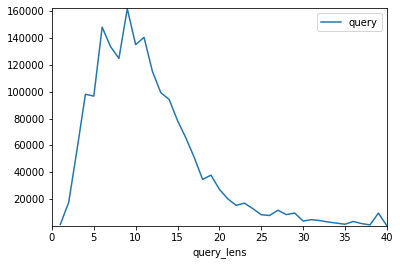

In [153]:
qlgb.plot(x='query_lens', y='query', kind='line', xlim=(0, 40), ylim=(1, 162000))

<AxesSubplot:xlabel='query_lens'>

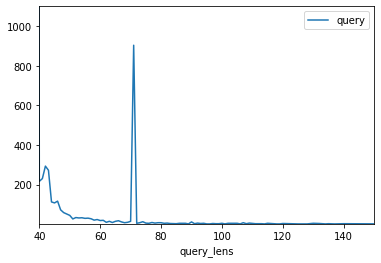

In [158]:
qlgb.plot(x='query_lens', y='query', kind='line', xlim=(40, 150), ylim=(1, 1100))

In [160]:
qlgb[40:][qlgb['query'] > 250]

/tmp/ipykernel_5961/2823599382.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  qlgb[40:][qlgb['query'] > 250]


,query_lens,query
41,42,293
42,43,272
70,71,904


In [162]:
query_lens[query_lens['query_lens'] == 71]

,query,query_lens
2012,2398896 2402035 5386263 5386272 6804112 857993...,71
2013,2398896 2402035 5386263 5386272 6804112 857993...,71
2509,2398896 2402035 5386263 5386272 6804112 857993...,71
2994,2398896 2402035 5386263 5386272 6804112 857993...,71
9365,2398896 2402035 5386263 5386272 6804112 857993...,71
...,...,...
1861700,2398896 2402035 5386263 5386272 6804112 857993...,71
1861701,2398896 2402035 5386263 5386272 6804112 857993...,71
1861702,2398896 2402035 5386263 5386272 6804112 857993...,71
1861703,2398896 2402035 5386263 5386272 6804112 857993...,71


- outlier query length

In [164]:
qlgb['cumulative']=qlgb['query'].cumsum()

In [169]:
total_queries = qlgb['query'].sum()
qlgb['cum_percent'] = ((qlgb['cumulative'] * 100)/total_queries).round(2)

In [170]:
qlgb

,query_lens,query,cumulative,cum_percent
0,1,1091,1091,0.06
1,2,17480,18571,1.00
2,3,56946,75517,4.05
3,4,98071,173588,9.31
4,5,96696,270284,14.49
5,6,148053,418337,22.43
6,7,133578,551915,29.59
7,8,124744,676659,36.28
8,9,161786,838445,44.95
9,10,135029,973474,52.19


- 99% queries have query length under 35 characters

# [EDA] Query by Words

In [10]:
query_lens

,query,query_lens
0,Televisiones Panasonic 50 pulgadas,35
1,Sharp,5
2,nook,4
3,rca,3
4,rca,3
...,...,...
1865264,ttv,3
1865265,incase,6
1865266,ds games,8
1865267,Archos,6


In [11]:
query_words = query_lens.copy()

In [12]:
# lower case, remove symbols, clean up
query_words['lower'] = query_words['query'].apply(lambda x: str(x).lower())
query_words['clean'] = query_words['lower'].apply(lambda x: re.sub(r'[^\w]', ' ', x))

In [13]:
query_words

,query,query_lens,lower,clean
0,Televisiones Panasonic 50 pulgadas,35,televisiones panasonic 50 pulgadas,televisiones panasonic 50 pulgadas
1,Sharp,5,sharp,sharp
2,nook,4,nook,nook
3,rca,3,rca,rca
4,rca,3,rca,rca
...,...,...,...,...
1865264,ttv,3,ttv,ttv
1865265,incase,6,incase,incase
1865266,ds games,8,ds games,ds games
1865267,Archos,6,archos,archos


In [14]:
query_words[query_words['lower'] != query_words['clean']]

,query,query_lens,lower,clean
81,n�vi 2460LMT,12,n�vi 2460lmt,n vi 2460lmt
178,Toshiba- 55 Class / 1080p / 120Hz / LCD HDTV,44,toshiba- 55 class / 1080p / 120hz / lcd hdtv,toshiba 55 class 1080p 120hz lcd hdtv
242,E-40,4,e-40,e 40
254,galaxy tab 10.1,15,galaxy tab 10.1,galaxy tab 10 1
314,pc-tv-media adapters,20,pc-tv-media adapters,pc tv media adapters
...,...,...,...,...
1865109,samsung galaxy tab 10.1,23,samsung galaxy tab 10.1,samsung galaxy tab 10 1
1865110,spider-man 3,12,spider-man 3,spider man 3
1865150,house m.d. season 7 dvd,23,house m.d. season 7 dvd,house m d season 7 dvd
1865172,Dr. Dre beats,13,dr. dre beats,dr dre beats


In [17]:
query_words['counter'] = 1

In [26]:
qwg = query_words[['clean', 'counter']].groupby('clean', as_index=False).count()

In [27]:
qwg = qwg.sort_values('counter', ascending=False)

In [29]:
qwg = qwg.reset_index(drop=True)

In [38]:
qwg_most_frequent = qwg[qwg['counter'] > 100]
with pd.option_context('display.max_rows', len(qwg_most_frequent), 'display.max_columns', None):
    display(qwg_most_frequent)

,clean,counter
0,lcd tv,16936
1,ipad,15614
2,hp touchpad,14362
3,iphone 4s,9615
4,2622037 2127204 2127213 2121716 2138291,8531
5,touchpad,8177
6,laptop,7572
7,laptops,7176
8,beats,7158
9,ipod,6453


In [8]:
sdf[sdf['subcategory_id'] == 'abcat0800000']

,subcategory_id,subcategory_name,category_id,category_name,path_ids,path_names
1666,abcat0800000,Mobile Phones,cat00000,Best Buy,/cat00000/,/Best Buy/
